In [2]:
!pip install pyspark

     |████████████████████████████████| 212.4 MB 65 kB/s 
     |████████████████████████████████| 198 kB 21.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=0fbef593888ca48e8c188035a40b1d51ec293aad8950e1e3f7b9953d97fea3d3
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [93]:
import pandas as pd 
import numpy as np
import pyspark

In [6]:
from pyspark.sql import SparkSession

In [7]:
spark = SparkSession.builder.appName("CarPrediction").getOrCreate()

In [8]:
# Using read.csv to read the dataset
df = spark.read.csv("./audi.csv", inferSchema=True, header=True)

In [9]:
for col in df.columns:
  print(col, "\t", "with null values: ", df.filter(df[col].isNull()).count())

model 	 with null values:  0
year 	 with null values:  0
price 	 with null values:  0
transmission 	 with null values:  0
mileage 	 with null values:  0
fuelType 	 with null values:  0
tax 	 with null values:  0
mpg 	 with null values:  0
engineSize 	 with null values:  0


In [10]:
for col in df.columns:
  print(col, "\t", "with ? values: ", df.filter(df[col]=="?").count())

model 	 with ? values:  0
year 	 with ? values:  0
price 	 with ? values:  0
transmission 	 with ? values:  0
mileage 	 with ? values:  0
fuelType 	 with ? values:  0
tax 	 with ? values:  0
mpg 	 with ? values:  0
engineSize 	 with ? values:  0


In [11]:
df.printSchema() # outputs the schema types which are automatically determined by spark

root
 |-- model: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- transmission: string (nullable = true)
 |-- mileage: integer (nullable = true)
 |-- fuelType: string (nullable = true)
 |-- tax: integer (nullable = true)
 |-- mpg: double (nullable = true)
 |-- engineSize: double (nullable = true)



In [12]:
df.show()

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|12500|      Manual|  15735|  Petrol|150|55.4|       1.4|
|   A6|2016|16500|   Automatic|  36203|  Diesel| 20|64.2|       2.0|
|   A1|2016|11000|      Manual|  29946|  Petrol| 30|55.4|       1.4|
|   A4|2017|16800|   Automatic|  25952|  Diesel|145|67.3|       2.0|
|   A3|2019|17300|      Manual|   1998|  Petrol|145|49.6|       1.0|
|   A1|2016|13900|   Automatic|  32260|  Petrol| 30|58.9|       1.4|
|   A6|2016|13250|   Automatic|  76788|  Diesel| 30|61.4|       2.0|
|   A4|2016|11750|      Manual|  75185|  Diesel| 20|70.6|       2.0|
|   A3|2015|10200|      Manual|  46112|  Petrol| 20|60.1|       1.4|
|   A1|2016|12000|      Manual|  22451|  Petrol| 30|55.4|       1.4|
|   A3|2017|16100|      Manual|  28955|  Petrol|145|58.9|       1.4|
|   A6|2016|16500|   Automatic|  5

In [13]:
df.columns

['model',
 'year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

In [14]:
df.describe()

DataFrame[summary: string, model: string, year: string, price: string, transmission: string, mileage: string, fuelType: string, tax: string, mpg: string, engineSize: string]

In [15]:
# taking the cars whose price is less than 15000 and the transmission is Manual
df.filter((df["transmission"] == "Manual") & (df["price"]<15000)).show()

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|12500|      Manual|  15735|  Petrol|150|55.4|       1.4|
|   A1|2016|11000|      Manual|  29946|  Petrol| 30|55.4|       1.4|
|   A4|2016|11750|      Manual|  75185|  Diesel| 20|70.6|       2.0|
|   A3|2015|10200|      Manual|  46112|  Petrol| 20|60.1|       1.4|
|   A1|2016|12000|      Manual|  22451|  Petrol| 30|55.4|       1.4|
|   A6|2015|14000|      Manual|  61176|  Diesel| 30|62.8|       2.0|
|   A1|2017|10800|      Manual|  31447|  Petrol|145|67.3|       1.0|
|   A3|2015|11300|      Manual|  75619|  Diesel| 20|68.9|       2.0|
|   A4|2016|12750|      Manual|  52561|  Diesel|  0|74.3|       2.0|
|   A1|2014|11000|      Manual|  34315|  Petrol|125|53.3|       1.4|
|   A3|2016|10200|      Manual|  66369|  Diesel|  0|83.1|       1.6|
|   A1|2013| 7000|      Manual|  7

In [16]:
df.groupBy("model")

In [17]:
df.groupBy("model").count().show()

+-----+-----+
|model|count|
+-----+-----+
|   A7|  122|
|  SQ7|    8|
|   A4| 1381|
|  RS3|   33|
|   S3|   18|
|  RS5|   29|
|  RS6|   39|
|  SQ5|   16|
|   S4|   12|
|   Q8|   69|
|  RS4|   31|
|   A1| 1347|
|   A3| 1929|
|   Q2|  822|
|  RS7|    1|
|   Q7|  397|
|   Q3| 1417|
|   R8|   28|
|   S5|    3|
|   Q5|  877|
+-----+-----+
only showing top 20 rows



In [18]:
df.groupby("model").mean()[["model","avg(price)"]].show()

+-----+------------------+
|model|        avg(price)|
+-----+------------------+
|   A7|28865.516393442624|
|  SQ7|           49269.0|
|   A4|20255.450398262128|
|  RS3| 34050.51515151515|
|   S3|20379.444444444445|
|  RS5|51265.206896551725|
|  RS6|  55963.8717948718|
|  SQ5|        31415.8125|
|   S4|31248.083333333332|
|   Q8|60115.014492753624|
|  RS4|  50151.6129032258|
|   A1|14327.750556792873|
|   A3|17408.522032141005|
|   Q2|22516.975669099756|
|  RS7|           33490.0|
|   Q7|44788.319899244336|
|   Q3| 22999.26182074806|
|   R8| 97652.21428571429|
|   S5|           15980.0|
|   Q5|30445.688711516534|
+-----+------------------+
only showing top 20 rows



In [19]:
df.groupBy("year").mean()[["year","avg(tax)"]].show()

+----+------------------+
|year|          avg(tax)|
+----+------------------+
|2003|255.83333333333334|
|2007|          340.9375|
|2018| 146.1747685185185|
|2015| 98.95395395395396|
|2006| 371.1111111111111|
|2013|125.97938144329896|
|1997|             265.0|
|2014| 129.0268456375839|
|2019|  145.573975602127|
|2004|             319.0|
|1998|             265.0|
|2020| 145.5377094972067|
|2012|132.11764705882354|
|2009|223.47826086956522|
|2016| 85.06364562118127|
|2005| 269.2857142857143|
|2010|            176.25|
|2011| 160.2127659574468|
|2008|252.38095238095238|
|2017|123.17054263565892|
+----+------------------+
only showing top 20 rows



In [20]:
df.take(10)

[Row(model=' A1', year=2017, price=12500, transmission='Manual', mileage=15735, fuelType='Petrol', tax=150, mpg=55.4, engineSize=1.4),
 Row(model=' A6', year=2016, price=16500, transmission='Automatic', mileage=36203, fuelType='Diesel', tax=20, mpg=64.2, engineSize=2.0),
 Row(model=' A1', year=2016, price=11000, transmission='Manual', mileage=29946, fuelType='Petrol', tax=30, mpg=55.4, engineSize=1.4),
 Row(model=' A4', year=2017, price=16800, transmission='Automatic', mileage=25952, fuelType='Diesel', tax=145, mpg=67.3, engineSize=2.0),
 Row(model=' A3', year=2019, price=17300, transmission='Manual', mileage=1998, fuelType='Petrol', tax=145, mpg=49.6, engineSize=1.0),
 Row(model=' A1', year=2016, price=13900, transmission='Automatic', mileage=32260, fuelType='Petrol', tax=30, mpg=58.9, engineSize=1.4),
 Row(model=' A6', year=2016, price=13250, transmission='Automatic', mileage=76788, fuelType='Diesel', tax=30, mpg=61.4, engineSize=2.0),
 Row(model=' A4', year=2016, price=11750, transm

**Performing Data Visualization**
* Here we perform data visualization using matplotlib plotting functions

In [21]:
# Performing data visualization
import matplotlib.pyplot as plt


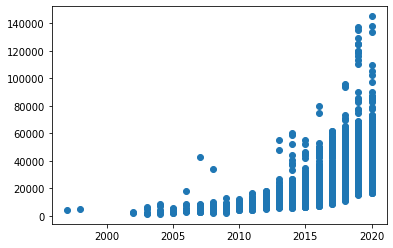

In [22]:

x1 = df.toPandas()["year"].values.tolist()
y1 = df.toPandas()["price"].values.tolist()
plt.scatter(x1,y1)


Text(0, 0.5, 'Model')

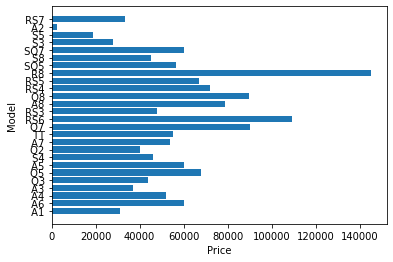

In [23]:
x2 = df.toPandas()["model"].values.tolist()
y2 = df.toPandas()["price"].values.tolist()
ax = plt.subplot()
ax.barh(x2,y2)
ax.set_xlabel("Price")
ax.set_ylabel("Model")

Text(0.5, 1.0, 'Mileage Per Model')

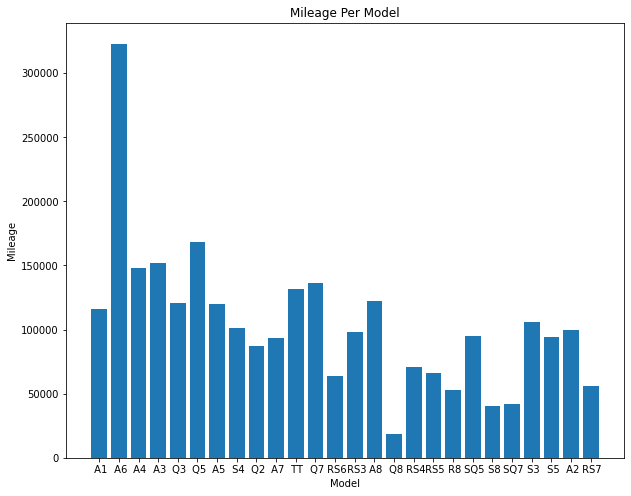

In [24]:
y3 = df.toPandas()["mileage"]
plt.figure(figsize=(10,8))
plt.bar(x2,y3)
plt.xlabel("Model")
plt.ylabel("Mileage")
plt.title(label="Mileage Per Model")

Text(0.5, 1.0, 'Relationship between price and mileage')

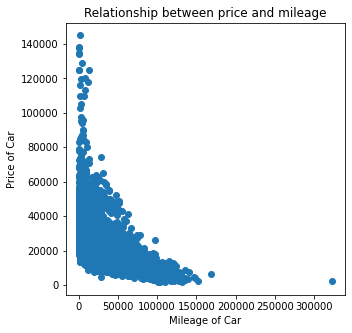

In [25]:
# Relationship between price and engine size
x12 = df.toPandas()["mileage"].values.tolist()
y12 = df.toPandas()["price"].values.tolist()
plt.figure(figsize=(5,5))
plt.scatter(x12,y12)
plt.xlabel("Mileage of Car")
plt.ylabel("Price of Car")
plt.title("Relationship between price and mileage")


Text(0.5, 1.0, 'Average Tax Per Model')

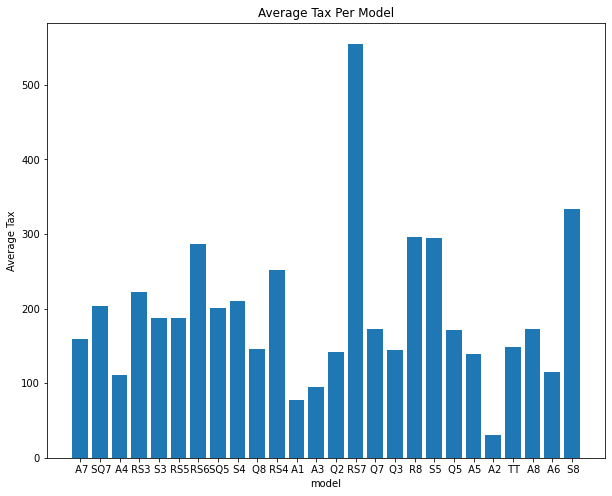

In [26]:
x4 = df.groupBy("model").mean()[["model","avg(tax)"]].toPandas()["model"].values.tolist()
y4 = df.groupBy("model").mean()[["model","avg(tax)"]].toPandas()["avg(tax)"].values.tolist()
plt.figure(figsize=(10,8))
plt.bar(x4, y4)
plt.xlabel("model")
plt.ylabel("Average Tax")
plt.title("Average Tax Per Model")


Text(0.5, 1.0, 'Types of Transmission')

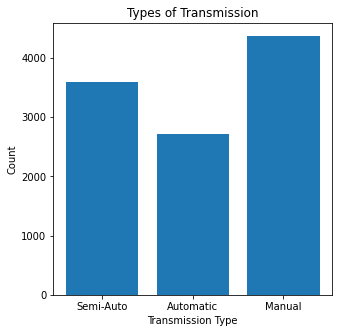

In [27]:
x5 = df.groupBy("transmission").count().toPandas()["transmission"].values.tolist()
y5 = df.groupBy("transmission").count().toPandas()["count"].values.tolist()
plt.figure(figsize=(5,5))
plt.bar(x5, y5)
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.title("Types of Transmission")


Text(0.5, 1.0, 'Average Price of each transmission')

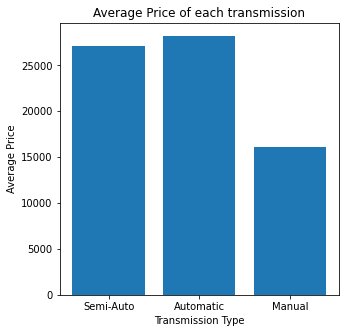

In [28]:
x6 = df.groupBy("transmission").count().toPandas()["transmission"].values.tolist()
y6 = df.groupBy("transmission").mean().toPandas()["avg(price)"].values.tolist()
plt.figure(figsize=(5,5))
plt.bar(x6, y6)
plt.xlabel("Transmission Type")
plt.ylabel("Average Price")
plt.title("Average Price of each transmission")


Text(0.5, 1.0, 'Number of car available based on Fuel Type')

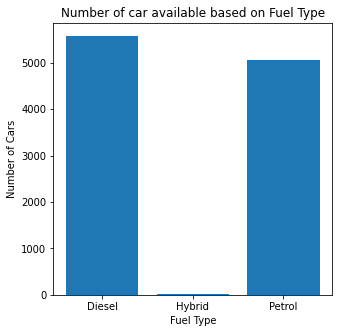

In [29]:
x7 = df.groupBy("fuelType").count().toPandas()["fuelType"].values.tolist()
y7 = df.groupBy("fuelType").count().toPandas()["count"].values.tolist()
plt.figure(figsize=(5,5))
plt.bar(x7, y7)
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")
plt.title("Number of car available based on Fuel Type")


Text(0.5, 1.0, 'Average Price of car based on Fuel Type')

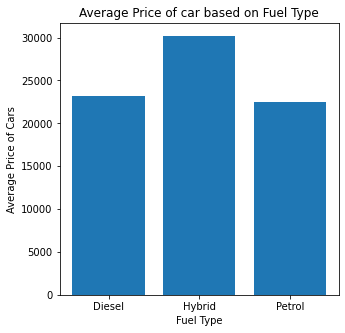

In [30]:
x8 = df.groupBy("fuelType").count().toPandas()["fuelType"].values.tolist()
y8 = df.groupBy("fuelType").mean().toPandas()["avg(price)"].values.tolist()
plt.figure(figsize=(5,5))
plt.bar(x8, y8)
plt.xlabel("Fuel Type")
plt.ylabel("Average Price of Cars")
plt.title("Average Price of car based on Fuel Type")


Text(0.5, 1.0, 'Average Price based on Size of Engine')

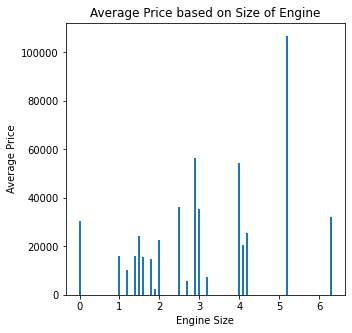

In [31]:
# Relationship between price and engine size
x9 = df.groupBy("engineSize").mean().toPandas()["engineSize"].values.tolist()
y9 = df.groupBy("engineSize").mean().toPandas()["avg(price)"].values.tolist()
plt.figure(figsize=(5,5))
plt.bar(x9,y9,width=0.05)
plt.xlabel("Engine Size")
plt.ylabel("Average Price")
plt.title("Average Price based on Size of Engine")


Text(0.5, 1.0, 'Average Price based on MPG(Miles-Per-Gallon)')

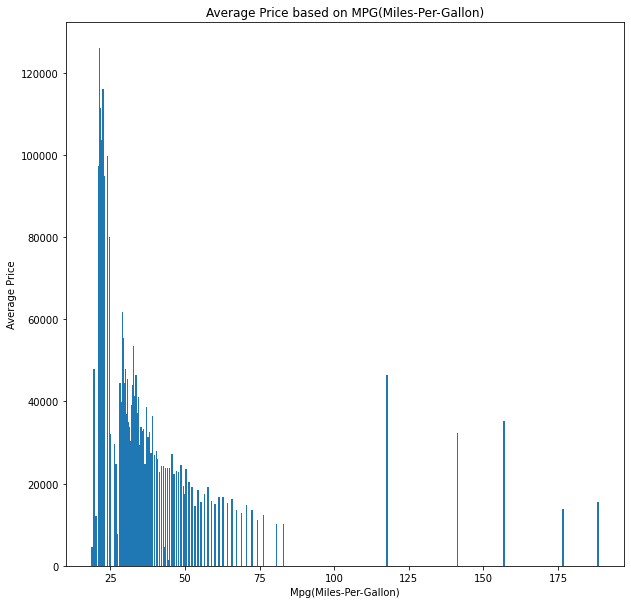

In [32]:
# Relationship between price and miles per gallon (mpg)
# Relationship between price and engine size
x10 = df.groupBy("mpg").mean().toPandas()["mpg"].values.tolist()
y10 = df.groupBy("mpg").mean().toPandas()["avg(price)"].values.tolist()
plt.figure(figsize=(10,10))
plt.bar(x10,y10,width=0.5)
plt.xlabel("Mpg(Miles-Per-Gallon)")
plt.ylabel("Average Price")
plt.title("Average Price based on MPG(Miles-Per-Gallon)")


**Feature Engineering(DataTransformation)**
* Performing oneHotEncoder

In [33]:
# converting categorical data in model column using the one hot encoder 
from pyspark.ml.feature import (VectorAssembler, VectorIndexer,OneHotEncoder,StringIndexer)

In [34]:
model_indexer = StringIndexer(inputCol='model', outputCol='modelIndex')
model_encoder = OneHotEncoder(inputCol='modelIndex', outputCol='modelVector')

In [35]:
transmission_indexer = StringIndexer(inputCol='transmission', outputCol='transmissionIndex')
transmission_encoder = OneHotEncoder(inputCol='transmissionIndex', outputCol='transmissionVec')

In [36]:
fuel_type_indexer = StringIndexer(inputCol='fuelType', outputCol='fuelTypeIndex')
fuel_type_encoder = OneHotEncoder(inputCol='fuelTypeIndex', outputCol='fuelTypeVector')

In [37]:
assembler = VectorAssembler(inputCols=['modelVector', 'year', 'transmissionVec'
            ,'mileage','fuelTypeVector','tax','mpg','engineSize'],outputCol='features')

In [38]:
# pearson = Correlation.corr(df, 'features').head()

In [39]:
# print(str(pearson[0]))

In [40]:
# # Another method
# spearman = Correlation.corr(df, 'features', 'spearman').head()

In [41]:
# print(str(spearman[0]))

In [42]:
# df.features.collect()

**Building Regression Model**
* Using multiple regression algorithms

In [43]:
from pyspark.ml.regression import LinearRegression

In [44]:
linear_reg = LinearRegression(featuresCol='features',labelCol='price', maxIter=10)

In [45]:
from pyspark.ml.regression import LinearRegressionModel
linear_reg_model = LinearRegressionModel()

In [46]:
trainData, testData = df.randomSplit([0.7,.03])

In [47]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[model_indexer,transmission_indexer,fuel_type_indexer,
                            model_encoder,transmission_encoder,fuel_type_encoder,
                            assembler,linear_reg])

In [48]:
linear_fit = pipeline.fit(trainData)

In [49]:
results = linear_fit.transform(testData)
# linear_fit.predict(testData)

In [50]:
results.head(5)

[Row(model=' A1', year=2012, price=7714, transmission='Manual', mileage=43133, fuelType='Diesel', tax=0, mpg=74.3, engineSize=1.6, modelIndex=3.0, transmissionIndex=0.0, fuelTypeIndex=0.0, modelVector=SparseVector(25, {3: 1.0}), transmissionVec=SparseVector(2, {0: 1.0}), fuelTypeVector=SparseVector(2, {0: 1.0}), features=SparseVector(34, {3: 1.0, 25: 2012.0, 26: 1.0, 28: 43133.0, 29: 1.0, 32: 74.3, 33: 1.6}), prediction=3562.339287405368),
 Row(model=' A1', year=2013, price=7700, transmission='Manual', mileage=72120, fuelType='Petrol', tax=125, mpg=52.3, engineSize=1.4, modelIndex=3.0, transmissionIndex=0.0, fuelTypeIndex=1.0, modelVector=SparseVector(25, {3: 1.0}), transmissionVec=SparseVector(2, {0: 1.0}), fuelTypeVector=SparseVector(2, {1: 1.0}), features=SparseVector(34, {3: 1.0, 25: 2013.0, 26: 1.0, 28: 72120.0, 30: 1.0, 31: 125.0, 32: 52.3, 33: 1.4}), prediction=3957.3651719102636),
 Row(model=' A1', year=2013, price=8399, transmission='Manual', mileage=29899, fuelType='Petrol', 

In [51]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='price')

In [52]:
results.select('price','prediction').show()

+-----+------------------+
|price|        prediction|
+-----+------------------+
| 7714| 3562.339287405368|
| 7700|3957.3651719102636|
| 8399| 7042.512812403962|
| 8999|8014.1342955096625|
| 6900| 3465.880929246079|
| 7800| 6861.284512355458|
| 8298| 7426.733433630317|
| 8498| 6856.452345217578|
| 8999| 8057.678404130507|
|11950|10096.332674350124|
| 8554| 5083.577488305513|
| 8874|  9229.72036382882|
|10198| 7951.677097781561|
|10260| 12341.38814709289|
|10598|11641.375330333132|
|10995|14091.147303665988|
|12096|12574.561921628192|
|13500|13544.088871954475|
|10159|11211.797955218237|
|10994| 9769.224192924798|
+-----+------------------+
only showing top 20 rows



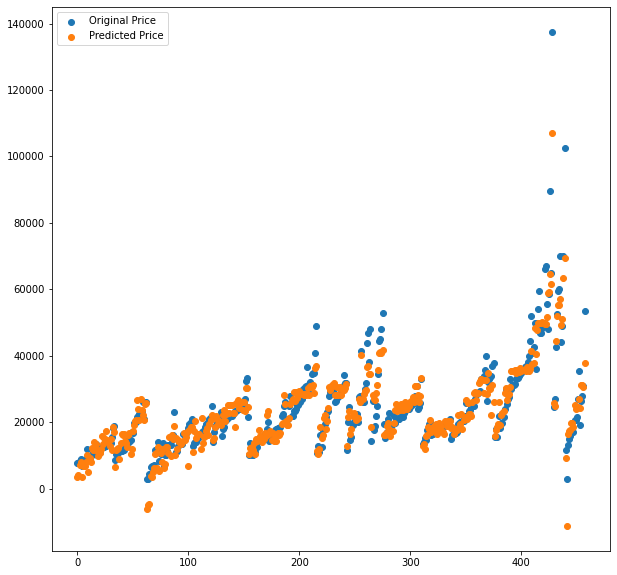

In [63]:
graph_res = results.select('price', 'prediction').toPandas()
x13 = graph_res["price"]
x14 = graph_res["prediction"]
plt.figure(figsize=(10,10))
plt.scatter(np.arange(0,len(x13),1),x13,label='Original Price')
plt.scatter(np.arange(0,len(x14),1),x14, label="Predicted Price")
plt.legend(loc="upper left")

In [65]:
my_eval.evaluate(results)

1.0

In [66]:
from pyspark.ml.evaluation import RegressionEvaluator
my_ref_eval = RegressionEvaluator(predictionCol='prediction',labelCol='price')

In [67]:
my_ref_eval.evaluate(results)

4335.920678693018

In [68]:
my_ref_eval.evaluate(results, {my_ref_eval.metricName:"r2"})

0.8963288334259789

In [69]:
my_ref_eval.evaluate(results, {my_ref_eval.metricName:"rmse"})

4335.920678693018

In [70]:
my_ref_eval.evaluate(results, {my_ref_eval.metricName:"mse"})

18800208.131917726

**RandomForest Regression Algorithm**

In [71]:
from pyspark.ml.regression import RandomForestRegressor

In [72]:
randomforest = RandomForestRegressor(featuresCol='features',labelCol='price')

In [73]:
from pyspark.ml import Pipeline
pipeline1 = Pipeline(stages=[model_indexer,transmission_indexer,fuel_type_indexer,
                            model_encoder,transmission_encoder,fuel_type_encoder,
                            assembler,randomforest])
# df.na.drop()

In [ ]:
# from pyspark.ml.tuning import ParamGridBuilder
# import numpy as np
# paramGrid = ParamGridBuilder() \
#     .addGrid(randomforest.numTrees, [int(x) for x in np.linspace(start = 10, stop = 15, num = 3)]) \
#     .addGrid(randomforest.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 10, num = 3)]) \
#     .build()

In [ ]:
# from pyspark.ml.tuning import CrossValidator
# from pyspark.ml.evaluation import RegressionEvaluator
# crossval = CrossValidator(estimator=pipeline1,
#                           estimatorParamMaps=paramGrid,
#                           evaluator=RegressionEvaluator(labelCol='price'),
#                           numFolds=3)
# # trainData = trainData.na.drop()
# cvModel = crossval.fit(df)

In [74]:
randomforestresult = pipeline1.fit(trainData)
randomFResult = randomforestresult.transform(testData)

In [75]:
print(randomFResult.head(5))

[Row(model=' A1', year=2012, price=7714, transmission='Manual', mileage=43133, fuelType='Diesel', tax=0, mpg=74.3, engineSize=1.6, modelIndex=3.0, transmissionIndex=0.0, fuelTypeIndex=0.0, modelVector=SparseVector(25, {3: 1.0}), transmissionVec=SparseVector(2, {0: 1.0}), fuelTypeVector=SparseVector(2, {0: 1.0}), features=SparseVector(34, {3: 1.0, 25: 2012.0, 26: 1.0, 28: 43133.0, 29: 1.0, 32: 74.3, 33: 1.6}), prediction=10860.571943657447), Row(model=' A1', year=2013, price=7700, transmission='Manual', mileage=72120, fuelType='Petrol', tax=125, mpg=52.3, engineSize=1.4, modelIndex=3.0, transmissionIndex=0.0, fuelTypeIndex=1.0, modelVector=SparseVector(25, {3: 1.0}), transmissionVec=SparseVector(2, {0: 1.0}), fuelTypeVector=SparseVector(2, {1: 1.0}), features=SparseVector(34, {3: 1.0, 25: 2013.0, 26: 1.0, 28: 72120.0, 30: 1.0, 31: 125.0, 32: 52.3, 33: 1.4}), prediction=11096.929138051168), Row(model=' A1', year=2013, price=8399, transmission='Manual', mileage=29899, fuelType='Petrol', t

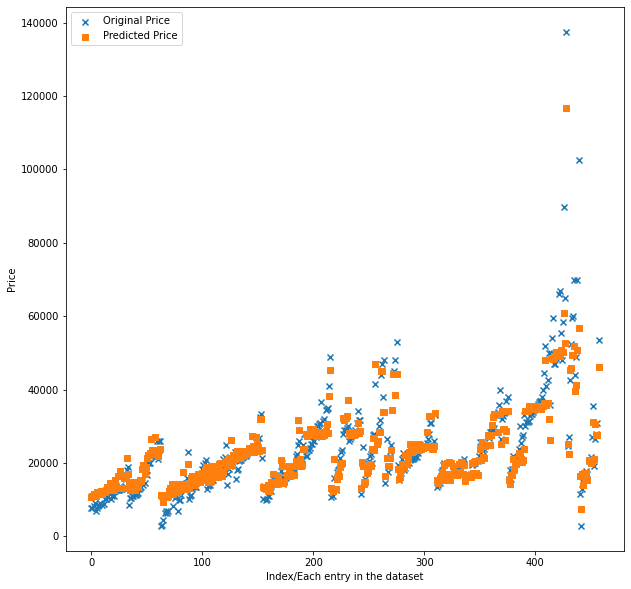

In [87]:
graph_random = randomFResult.select('price', 'prediction').toPandas()
x15 = graph_random["price"]
x16 = graph_random["prediction"]
plt.figure(figsize=(10,10))
plt.scatter(np.arange(0,len(x15),1),x15,marker='x',label='Original Price')
plt.xlabel("Index/Each entry in the dataset")
plt.ylabel("Price")
plt.scatter(np.arange(0,len(x16),1),x16,marker='s', label="Predicted Price")
plt.legend(loc="upper left")

In [82]:
from pyspark.ml.evaluation import RegressionEvaluator
my_ref_eval1 = RegressionEvaluator(predictionCol='prediction',labelCol='price')

In [83]:
my_ref_eval1.evaluate(randomFResult)

4640.726555736051

In [84]:
my_ref_eval.evaluate(randomFResult, {my_ref_eval.metricName:"r2"})

0.8812407935452036

In [85]:
my_ref_eval.evaluate(randomFResult, {my_ref_eval.metricName:"rmse"})

4640.726555736051

In [86]:
my_ref_eval.evaluate(randomFResult, {my_ref_eval.metricName:"mse"})

21536342.96511379

**Gradient Boosting Regression**

In [88]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator


# Train a GBT model.
gbt = GBTRegressor(featuresCol="features",labelCol="price", maxIter=10)

# Chain indexer and GBT in a Pipeline
pipeline_gbt = Pipeline(stages=[model_indexer,transmission_indexer,fuel_type_indexer,
                            model_encoder,transmission_encoder,fuel_type_encoder,
                            assembler, gbt])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "price", "features").show(5)


+------------------+-----+--------------------+
|        prediction|price|            features|
+------------------+-----+--------------------+
| 3562.339287405368| 7714|(34,[3,25,26,28,2...|
|3957.3651719102636| 7700|(34,[3,25,26,28,3...|
| 7042.512812403962| 8399|(34,[3,25,26,28,3...|
|8014.1342955096625| 8999|(34,[3,25,26,28,3...|
| 3465.880929246079| 6900|(34,[3,25,26,28,2...|
+------------------+-----+--------------------+
only showing top 5 rows



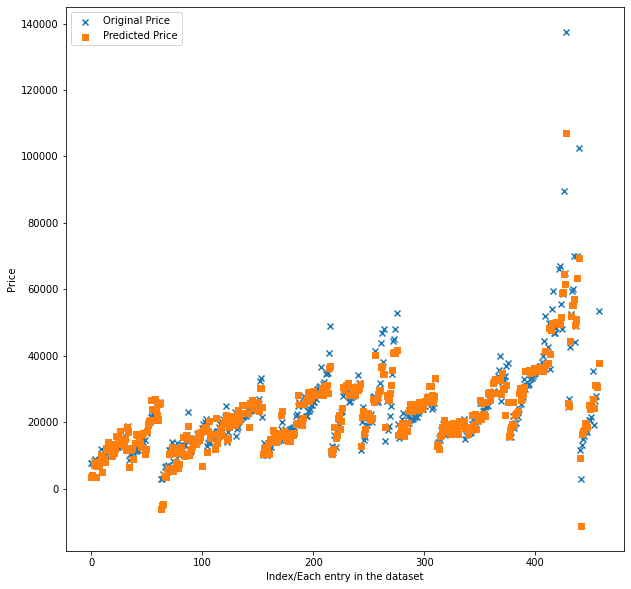

In [90]:
graph_gbt = predictions.select("prediction", "price").toPandas()
x17 = graph_gbt["price"]
x18 = graph_gbt["prediction"]
plt.figure(figsize=(10,10))
plt.scatter(np.arange(0,len(x17),1),x17,marker='x',label='Original Price')
plt.xlabel("Index/Each entry in the dataset")
plt.ylabel("Price")
plt.scatter(np.arange(0,len(x18),1),x18,marker='s', label="Predicted Price")
plt.legend(loc="upper left")

In [91]:

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


Root Mean Squared Error (RMSE) on test data = 4335.92


In [92]:
evaluatorR2 = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="r2")
r2 = evaluatorR2.evaluate(predictions)
print("R2 Score on test data= %g" % r2)
gbtModel = model.stages[1]
print(gbtModel)  # summary only


R2 Score on test data= 0.896329
StringIndexerModel: uid=StringIndexer_c84dc6c2ef16, handleInvalid=error
